In [45]:
import numpy as np
import librosa
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [46]:
load_dotenv()

True

In [47]:
DATA_PATH = os.getenv('DATA_PATH')
DATA_PATH

'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio'

In [48]:
folds = ["fold1", "fold2", "fold3", "fold4", "fold5", "fold6", "fold7", "fold8", "fold9", "fold10"]

In [49]:
path_dictionary = {}
for fold in folds:
    path_dictionary[fold] = os.path.join(DATA_PATH, fold)

path_dictionary

{'fold1': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold1',
 'fold2': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold2',
 'fold3': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold3',
 'fold4': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold4',
 'fold5': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold5',
 'fold6': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold6',
 'fold7': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold7',
 'fold8': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold8',
 'fold9': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold9',
 'fold10': 'D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSound8K/audio\\fold10'}

In [50]:
METADATA_PATH = os.getenv('METADATA_PATH')
METADATA_PATH

metadata = pd.read_csv(METADATA_PATH)
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


### Create Audio Paths and Labels

In [51]:
def create_audio_paths(metadata):
    audio_paths = []
    for index, row in metadata.iterrows():
        fold = row['fold']
        audio_path = os.path.join(path_dictionary[f"fold{fold}"], row['slice_file_name'])
        audio_paths.append(audio_path)
    return audio_paths

metadata['audio_path'] = create_audio_paths(metadata)
metadata.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class,audio_path
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSou...
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSou...
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSou...
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSou...
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,D:/datasets/UrbanSound8k/UrbanSound8K/UrbanSou...


Audio shape: (14004,)


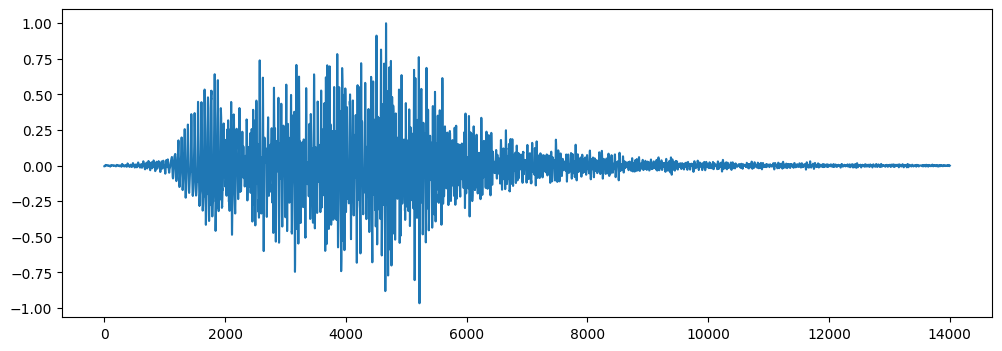

In [52]:
from librosa.display import specshow
import IPython.display as ipd

def visualize_audio(audio_path):
    audio,sr = librosa.load(audio_path, sr=None)
    print(f"Audio shape: {audio.shape}")
    plt.figure(figsize=(12, 4))
    plt.plot(audio)
    plt.show()
    return audio, sr,ipd.Audio(audio, rate=sr)
    
audio,sr,ipd_audio = visualize_audio(metadata.iloc[0]["audio_path"])


In [55]:
#Sampling rate: Are all files at the same rate? Typical values: 8kHz, 16kHz, 44.1kHz.
def check_sampling_rate(metadata):
    sampling_rates = []
    for index, row in tqdm(metadata.iterrows(),total=len(metadata)):
        audio_path = row["audio_path"]
        audio, sr = librosa.load(audio_path, sr=None)
        sampling_rates.append(sr)
    return sampling_rates
sampling_rates = check_sampling_rate(metadata)
print(sampling_rates)


100%|██████████| 8732/8732 [01:56<00:00, 74.66it/s] 

[44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 48000, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 48000, 48000, 48000, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100

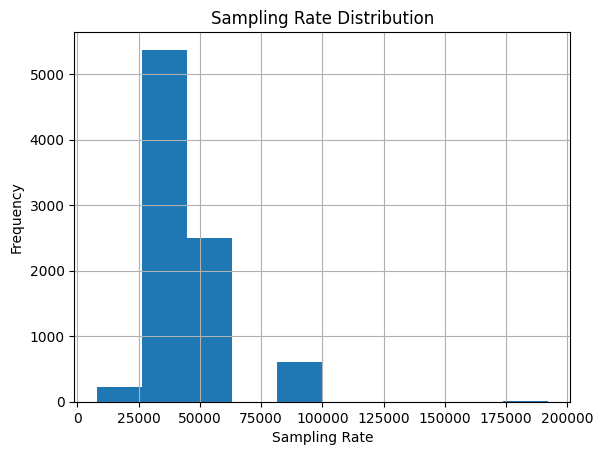

In [59]:
df_sampling_rates = pd.DataFrame(sampling_rates, columns=["sampling_rate"])
df_sampling_rates.describe()
df_sampling_rates.hist()
plt.title("Sampling Rate Distribution")
plt.xlabel("Sampling Rate")
plt.ylabel("Frequency")
plt.show()

In [60]:
### Unique Classes
def get_unique_classes(metadata):
    unique_classes = metadata['class'].unique()
    return unique_classes

unique_classes = get_unique_classes(metadata)
print(unique_classes)

['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


There are 10 unique class in hour UrbanSound dataset.<br>
- dog_bark
- children_playing
- car_horn
- air_conditioner
- street_music
- gun_shot
- siren
- engine_idling
- jackhammer
- drilling

In [61]:
def check_duration(metadata):
    durations = []
    for index, row in tqdm(metadata.iterrows(), total=len(metadata)):
        audio_path = row["audio_path"]
        audio, sr = librosa.load(audio_path, sr=None)
        durations.append(librosa.get_duration(y=audio, sr=sr))
    return durations

durations = check_duration(metadata)
print(durations)

100%|██████████| 8732/8732 [01:58<00:00, 73.83it/s] 

[0.31755102040816324, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6485260770975056, 1.05, 0.40532879818594103, 1.62, 1.86, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0998866213151928, 0.53, 0.3885487528344671, 0.81, 4.0, 1.64, 2.61, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 1.38, 4.0,

In [64]:
df_durations = pd.DataFrame(durations, columns=["duration"])
df_durations.describe()

,duration
count,8732.000000
mean,3.607522
std,0.974394
min,0.050000
25%,4.000000
50%,4.000000
75%,4.000000
max,4.036647


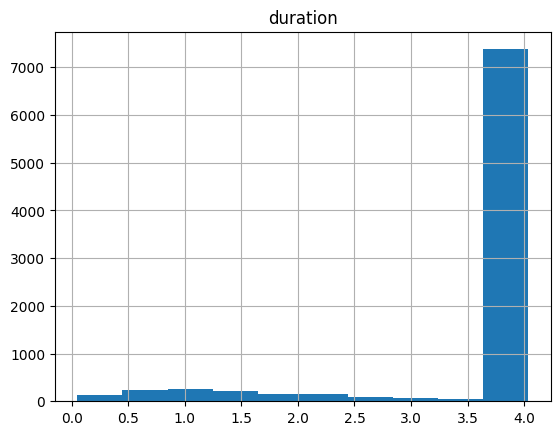

In [65]:
df_durations.hist()
plt.show()

### Visualizing audio weves

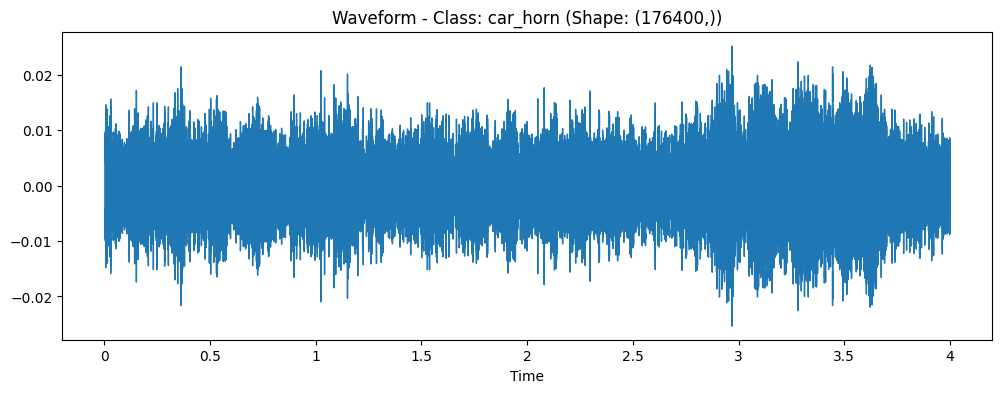

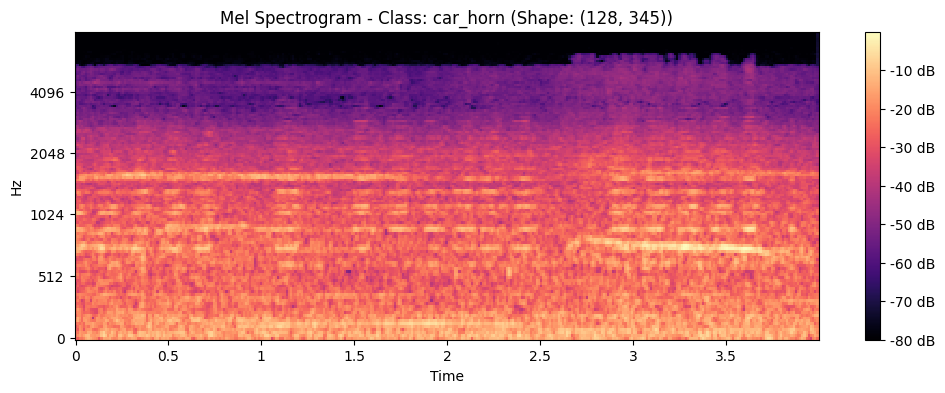

In [139]:
def get_random_audio_wave(metadata):
    random_index = np.random.randint(0, len(metadata))
    audio_path = metadata.iloc[random_index]["audio_path"]
    audio, sr = librosa.load(audio_path, sr=None)
    class_name = metadata.iloc[random_index]["class"]
    return audio, sr, class_name
def visualize_audio(metadata, visualization_type='both', class_name=None):
    """
    Visualize audio data as waveform and/or mel spectrogram
    Args:
        metadata: DataFrame containing audio metadata
        visualization_type: str, one of 'wave', 'mel', or 'both'
        class_name: str, optional - if provided, only visualize audio from this class
    Returns:
        Audio widget for playback if wave visualization is included
    """
    if class_name:
        metadata = metadata[metadata['class'] == class_name]
        if len(metadata) == 0:
            print(f"No samples found for class {class_name}")
            return
            
    audio, sr, selected_class = get_random_audio_wave(metadata)
    
    if visualization_type in ['wave', 'both']:
        plt.figure(figsize=(12, 4))
        librosa.display.waveshow(audio, sr=sr)
        plt.title(f"Waveform - Class: {selected_class} (Shape: {audio.shape})")
        plt.show()
        audio_widget = ipd.Audio(audio, rate=sr)
    
    if visualization_type in ['mel', 'both']:
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
        S_db = librosa.power_to_db(S, ref=np.max)
        plt.figure(figsize=(12, 4))
        img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
        plt.colorbar(img, format='%+2.0f dB')
        plt.title(f"Mel Spectrogram - Class: {selected_class} (Shape: {S_db.shape})")
        plt.show()
    
    if visualization_type == 'wave' or visualization_type == 'both':
        return audio_widget

visualize_audio(metadata, visualization_type='both',class_name='car_horn')


### Save Audio Files as Images

In [145]:
def save_audio_as_images(metadata,n_mels=128):
    for index, row in tqdm(metadata.iterrows(), total=len(metadata)):
        audio_path = row["audio_path"]
        audio, sr = librosa.load(audio_path, sr=None)
        class_name = row["class"]
        S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
        S_db = librosa.power_to_db(S, ref=np.max)
        image_data_path = f"d:/Urban Sound Classification/image_dataset/{n_mels}"
        if not os.path.exists(image_data_path):
            os.makedirs(image_data_path)
        image_path = os.path.join(image_data_path, f"{class_name}_{index}.png")
        plt.figure(figsize=(12, 4))
        plt.imshow(S_db)
        plt.axis('off')
        plt.tight_layout(pad=0)
        
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
        plt.close()
        
        # Display image dimensions
        img = plt.imread(image_path)

#save_audio_as_images(metadata)
save_audio_as_images(metadata,n_mels=256)
### Load Images

  3%|▎         | 278/8732 [01:02<35:17,  3.99it/s]c:\Users\Beytullah\anaconda3\envs\visea-uludag\lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
100%|██████████| 8732/8732 [32:03<00:00,  4.54it/s]   
